In [1]:
import os
os.chdir('..')

In [2]:
data_folder = '../data/'
server_folder = './server/'
template_folder = './templates/'
figure_folder = '../figures/'

import numpy as np
import json

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
sns.set(font_scale=1.5)

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
combinations = ['LS_grad',
         'LS_bfgs',
         'LS_bfgs-inv',
         'TR_bfgs',
         'LS_hess',
         'TR_hess',
         'LS-ABS_grad',
         'LS-ABS_bfgs',
         'LS-ABS_bfgs-inv',
         'TR-ABS_bfgs',
         'LS-ABS_hess',
         'TR-ABS_hess',
         'LS-ABS_hybrid',
         'TR-ABS_hybrid',
         'LS-ABS_hybrid-inv']

In [4]:
models = ['LPMC_DC_S', 
          'LPMC_DC_M', 
          'LPMC_DC_L',
          'LPMC_RR_S',
          'LPMC_RR_M',
          'LPMC_RR_L',
          'LPMC_Full_S',
          'LPMC_Full_M',
          'LPMC_Full_L',
          'MTMC']

In [5]:
comb_to_str = {
    'LS_grad': 'GD',
    'LS_bfgs': 'BFGS',
    'LS_bfgs-inv': 'BFGS$^{-1}$',
    'TR_bfgs': 'TR-BFGS',
    'LS_hess': 'NM',
    'TR_hess': 'TR',
    'LS-ABS_grad': 'GD-ABS',
    'LS-ABS_bfgs': 'BFGS-ABS',
    'LS-ABS_bfgs-inv': 'BFGS$^{-1}$-ABS',
    'TR-ABS_bfgs': 'TR-BFGS-ABS',
    'LS-ABS_hess': 'NM-ABS',
    'TR-ABS_hess': 'TR-ABS',
    'LS-ABS_hybrid': 'H-NM-ABS',
    'TR-ABS_hybrid': 'H-TR-ABS',
    'LS-ABS_hybrid-inv': 'HAMABS'
}

groups = [['LS_grad', 'LS_bfgs', 'LS_bfgs-inv', 'TR_bfgs', 'LS_hess', 'TR_hess'],
          ['LS-ABS_grad', 'LS-ABS_bfgs', 'LS-ABS_bfgs-inv', 'TR-ABS_bfgs', 'LS-ABS_hess', 'TR-ABS_hess'],
          ['LS-ABS_hybrid', 'TR-ABS_hybrid', 'LS-ABS_hybrid-inv']]

groups_name = ['standard', 'abs', 'hybrid']

filenames = ['ls', 'tr', 'ls-amabs', 'tr-amabs']


styles = {
     'LS_grad': {
        'line': (0, (1, 3)),
        'color': 'darkgrey'
    },
    'LS_bfgs': {
        'line': (0, (1, 1)),
        'color': 'darkgrey'
    },
    'LS_bfgs-inv': {
        'line': (0, (5, 1)),
        'color': 'darkgrey'
    },
    'TR_bfgs': {
        'line': (0, (5, 3)),
        'color': 'darkgrey'
    },
    'LS_hess': {
        'line': (0, (3, 1, 1, 1)),
        'color': 'darkgrey'
    },
    'TR_hess': {
        'line': (0, (3, 1, 1, 1, 1, 1)),
        'color': 'darkgrey'
    },
    'LS-ABS_grad': {
        'line': (0, (1, 3)),
        'color': 'dimgrey'
    },
    'LS-ABS_bfgs': {
        'line': (0, (1, 1)),
        'color': 'dimgrey'
    },
    'LS-ABS_bfgs-inv': {
        'line': (0, (5, 1)),
        'color': 'dimgrey'
    },
    'TR-ABS_bfgs': {
        'line': (0, (5, 3)),
        'color': 'dimgrey'
    },
    'LS-ABS_hess': {
        'line': (0, (3, 1, 1, 1)),
        'color': 'dimgrey'
    },
    'TR-ABS_hess': {
        'line': (0, (3, 1, 1, 1, 1, 1)),
        'color': 'dimgrey'
    },
    'LS-ABS_hybrid': {
        'line': (0, (3, 1, 1, 1)),
        'color': 'black'
    },
    'TR-ABS_hybrid': {
        'line': (0, (3, 1, 1, 1, 1, 1)),
        'color': 'black'
    },
    'LS-ABS_hybrid-inv': {
        'line': '-',
        'color': 'black'
    },
}

In [6]:
max_epochs = 1000

In [7]:
n_models = len(models)

res = np.zeros((len(combinations), n_models))

for j, mod in enumerate(models):
    for i, comb in enumerate(combinations):
        with open(server_folder + mod + '/results/' + comb + '.json', 'r') as infile:
            data = json.load(infile)
        
        if np.mean(data['epochs']) >= max_epochs:
            res[i,j] = np.inf
        else:
            res[i,j] = np.mean(data['time']) 

min_col = np.min(res, axis=0)

for k in range(n_models):
    res[:,k] = res[:,k]/min_col[k]
    
res[res == np.inf] = 0

print(res)

r_max = int(np.ceil(np.max(res)))

res[res == 0] = r_max+1

points = list(range(1,r_max+1))

perf = np.zeros((len(combinations), len(points)))

for j, pi in enumerate(points):

    for i in range(len(combinations)):

        perf[i,j] = np.sum(res[i,:] <= pi)/len(res[i,:])

print(perf)


[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ 16.81371107  17.68593122  17.43411467  15.34512155  18.26499737
   27.17083815  12.34891642  15.51309531  19.1929986    0.        ]
 [ 17.85585135  17.47079557  19.0431988   14.82948123  18.03127117
   26.09137346  12.17468238  14.62497518  18.12049621   0.        ]
 [ 13.39034522  14.90679089  16.67169582  19.01794193  21.97888444
    0.           0.           0.           0.           0.        ]
 [  1.60987052   1.6626581    1.89738805   3.00894685   3.80648975
    6.99222144   5.44250942   7.96890648   8.19247278  13.82673767]
 [  1.           1.           1.           1.97230614   2.50010811
    3.70059467   2.10131612   2.52049433   3.08838943   8.53220141]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ 16.01776054  14.5703152   14.82783909  14.17651409  17.03598459
   2

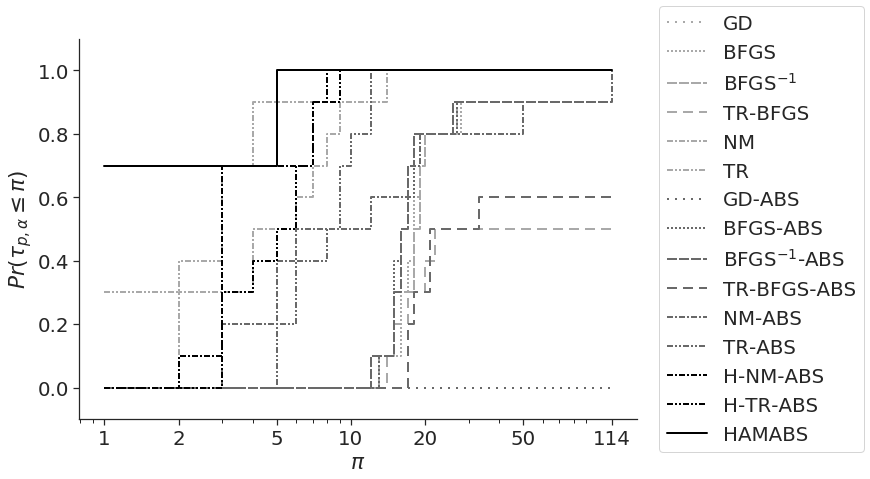

In [8]:
plt.figure(figsize=(10, 7), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.8)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i, c in enumerate(combinations):
    label = comb_to_str[c]
    
    p = plt.step(points, perf[i,:], where='post', linewidth=2, 
                 color=styles[c]['color'], label=label)
    
    for pp in p:
        pp.set_linestyle(styles[c]['line'])

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.xlabel('$\pi$')
plt.ylabel('$Pr(\\tau_{p,\\alpha} \leq \pi)$')
plt.ylim([-0.1, 1.1])
plt.xscale("log")
plt.xticks([1, 2, 5, 10, 20, 50, r_max], [1, 2, 5, 10, 20, 50,r_max])

plt.savefig(figure_folder + 'png/perf_profile.png', bbox_inches='tight')
plt.savefig(figure_folder + 'pdf/perf_profile.pdf', bbox_inches='tight')

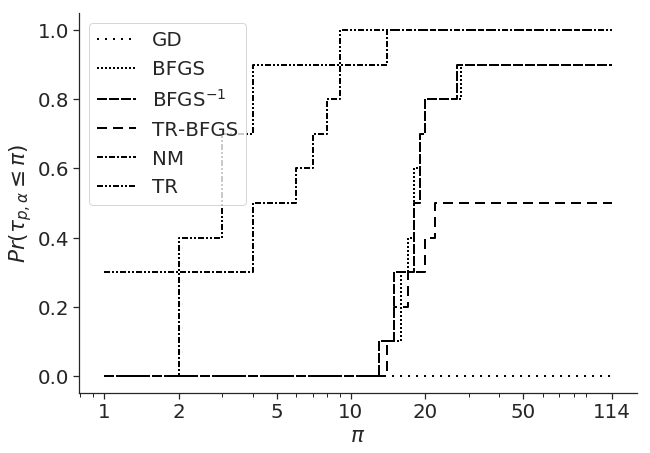

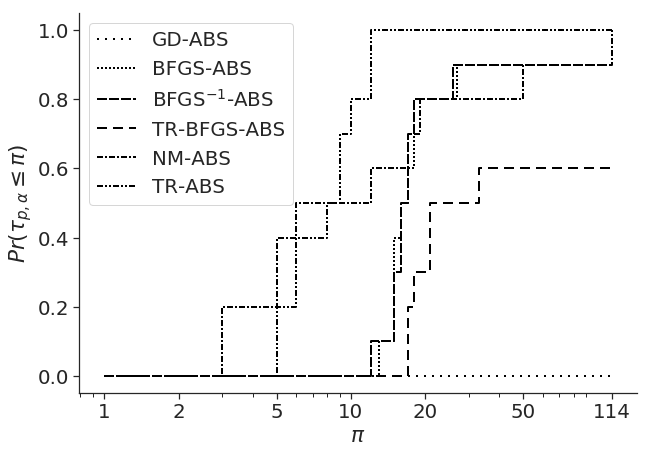

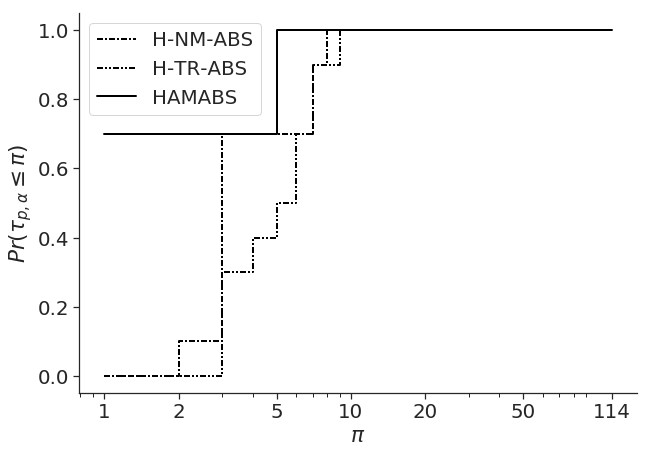

In [9]:
for (g, name) in zip(groups, groups_name):
    
    plt.figure(figsize=(10, 7), frameon=False)

    sns.set_context("paper")
    sns.set(font_scale = 1.8)
    sns.set_style("white", {
        "font.family": "sans-serif",
        "font.serif": ['Helvetica'],
    })
    sns.set_style("ticks", {"xtick.major.size": 4,
                            "ytick.major.size": 4})

    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


    for i, c in enumerate(combinations):
        
        if c in g:
            label = comb_to_str[c]

            p = plt.step(points, perf[i,:], where='post', linewidth=2, 
                         color='black', label=label)

            for pp in p:
                pp.set_linestyle(styles[c]['line'])

    #plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.legend()
    plt.xlabel('$\pi$')
    plt.ylabel('$Pr(\\tau_{p,\\alpha} \leq \pi)$')
    plt.xscale("log")
    plt.xticks([1, 2, 5, 10, 20, 50, r_max], [1, 2, 5, 10, 20, 50,r_max])

    plt.savefig(figure_folder + 'png/perf_profile_' + name + '.png', bbox_inches='tight')
    plt.savefig(figure_folder + 'pdf/perf_profile_' + name + '.pdf', bbox_inches='tight')

In [10]:
n_models = len(models)

res = np.zeros((len(combinations), n_models))

for j, mod in enumerate(models):
    for i, comb in enumerate(combinations):
        with open(server_folder + mod + '/results/' + comb + '.json', 'r') as infile:
            data = json.load(infile)
        
        if np.mean(data['epochs']) >= max_epochs:
            res[i,j] = np.inf
        else:
            res[i,j] = np.mean(data['epochs']) 

min_col = np.min(res, axis=0)

for k in range(n_models):
    res[:,k] = res[:,k]/min_col[k]
    
res[res == np.inf] = 0

r_max = int(np.ceil(np.max(res)))

res[res == 0] = r_max+1

points = list(range(1,r_max+1))

perf = np.zeros((len(combinations), len(points)))

for j, pi in enumerate(points):

    for i in range(len(combinations)):

        perf[i,j] = np.sum(res[i,:] <= pi)/len(res[i,:])

print(perf)


[[0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.8 0.8 0.9]
 [0.  0.  0.  ... 0.9 0.9 0.9]
 ...
 [0.  0.1 0.1 ... 1.  1.  1. ]
 [0.  0.  0.  ... 1.  1.  1. ]
 [0.  0.7 0.8 ... 1.  1.  1. ]]


In [11]:
r_max

129

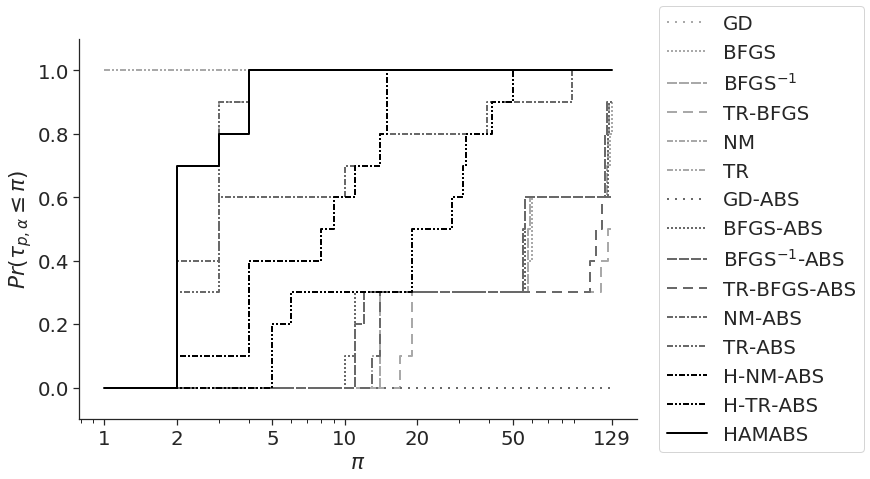

In [12]:
plt.figure(figsize=(10, 7), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.8)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i, c in enumerate(combinations):
    label = comb_to_str[c]
    
    p = plt.step(points, perf[i,:], where='post', linewidth=2, 
                 color=styles[c]['color'], label=label)
    
    for pp in p:
        pp.set_linestyle(styles[c]['line'])

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.xlabel('$\pi$')
plt.ylabel('$Pr(\\tau_{p,\\alpha} \leq \pi)$')
plt.ylim([-0.1, 1.1])
plt.xscale("log")
plt.xticks([1, 2, 5, 10, 20, 50, r_max], [1, 2, 5, 10, 20, 50, r_max])

plt.savefig(figure_folder + 'png/perf_profile_epochs.png', bbox_inches='tight')
plt.savefig(figure_folder + 'pdf/perf_profile_epochs.pdf', bbox_inches='tight')

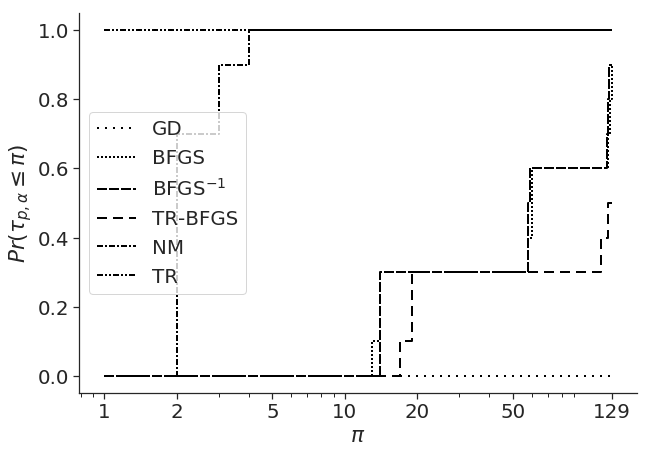

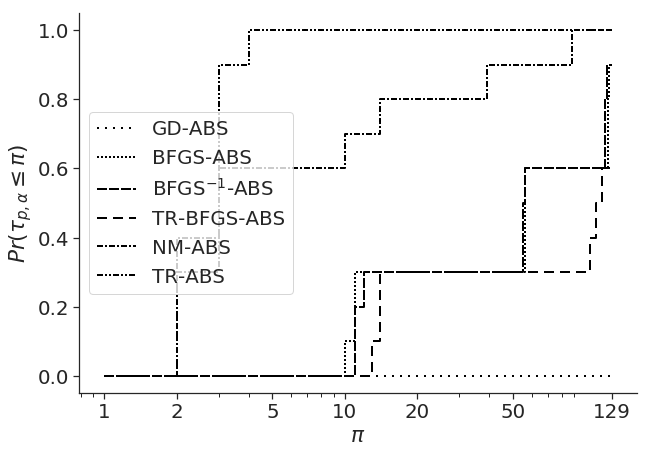

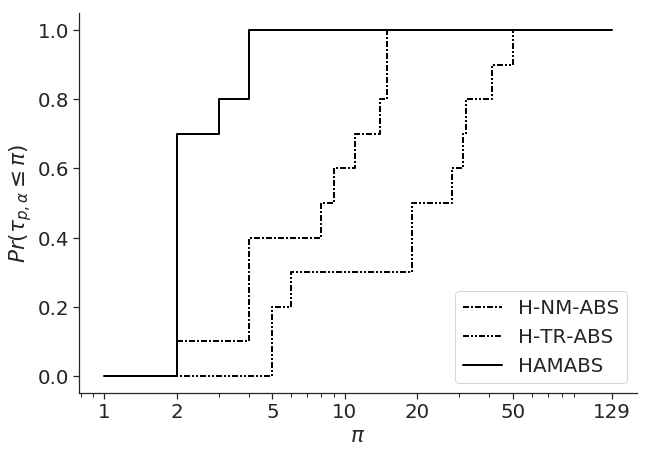

In [13]:
for (g, name) in zip(groups, groups_name):
    
    plt.figure(figsize=(10, 7), frameon=False)

    sns.set_context("paper")
    sns.set(font_scale = 1.8)
    sns.set_style("white", {
        "font.family": "sans-serif",
        "font.serif": ['Helvetica'],
    })
    sns.set_style("ticks", {"xtick.major.size": 4,
                            "ytick.major.size": 4})

    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


    for i, c in enumerate(combinations):
        
        if c in g:
            label = comb_to_str[c]

            p = plt.step(points, perf[i,:], where='post', linewidth=2, 
                         color='black', label=label)

            for pp in p:
                pp.set_linestyle(styles[c]['line'])

    #plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.legend()
    plt.xlabel('$\pi$')
    plt.ylabel('$Pr(\\tau_{p,\\alpha} \leq \pi)$')
    plt.xscale("log")
    plt.xticks([1, 2, 5, 10, 20, 50, r_max], [1, 2, 5, 10, 20, 50, r_max])

    plt.savefig(figure_folder + 'png/perf_profile_' + name + '_epochs.png', bbox_inches='tight')
    plt.savefig(figure_folder + 'pdf/perf_profile_' + name + '_epochs.pdf', bbox_inches='tight')